In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import optimize,stats,special
import mplhep as hep

In [2]:
# plt.style.available
plt.style.use("seaborn-paper")
mpl.rcParams.update({
    'font.family': 'STIXGeneral',
    # 'font.sans-serif': ['Times New Roman'],
    'mathtext.default':'rm',
    'mathtext.fontset':'stix',
    'mathtext.fallback_to_cm':False,
    "axes.titlesize" : 24,
"axes.labelsize" : 20,
"lines.linewidth" : 3,
"lines.markersize" : 10,
"xtick.labelsize" : 18,
"ytick.labelsize" : 18,
'savefig.dpi':300,
'legend.fontsize':20,
'figure.figsize':(8,6)
    })
plt.rcParams['axes.unicode_minus'] = False


/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [3]:
datadir = "../data/"

key1 = ["Co.dat","Env_full.dat","Eu_full.dat"]
key2 = ["Env_half.dat","Eu_half.dat","Sol.dat"]

In [4]:
data1 = {key[:-4]:np.loadtxt(datadir + key) for key in key1}
data2 = {key[:-4]:np.loadtxt(datadir + key) for key in key2}

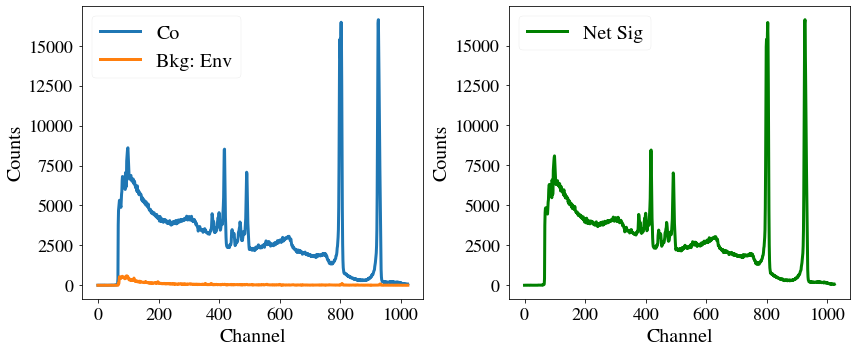

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(data1["Co"],label="Co")
plt.plot(data1["Env_full"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data1["Co"] - data1["Env_full"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Co_net.pdf")

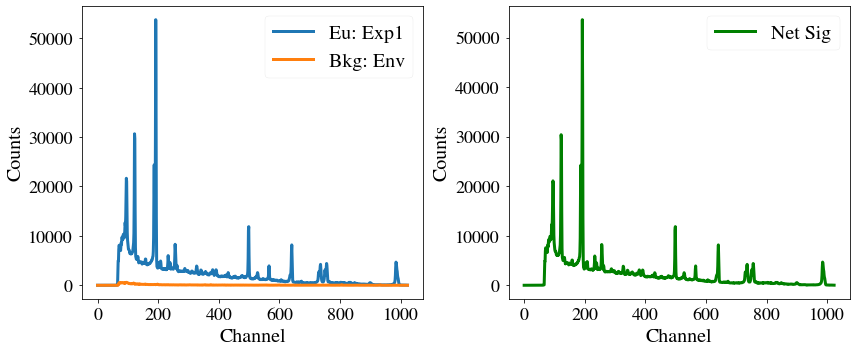

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(data1["Eu_full"],label="Eu: Exp1")
plt.plot(data1["Env_full"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data1["Eu_full"] - data1["Env_full"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Eu_full_net.pdf")

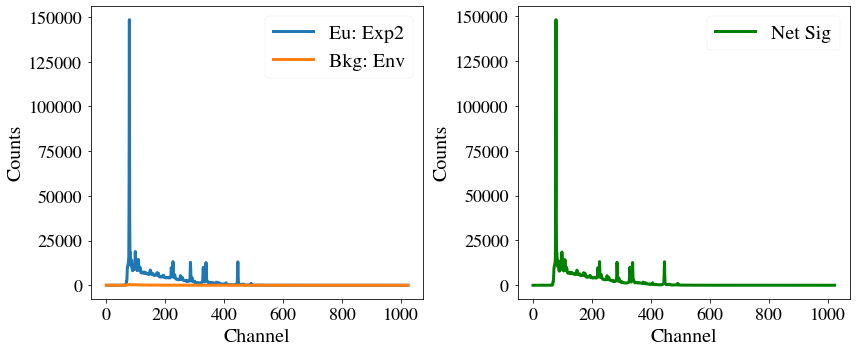

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(data2["Eu_half"],label="Eu: Exp2")
plt.plot(data2["Env_half"]/2,label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data2["Eu_half"] - data2["Env_half"]/2,label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Eu_half_net.pdf")

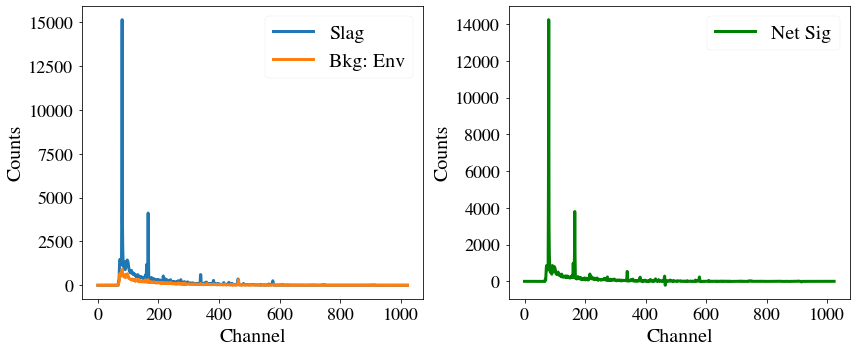

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(data2["Sol"],label="Slag")
plt.plot(data2["Env_half"],label = "Bkg: Env")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.subplot(122)
plt.plot(data2["Sol"] - data2["Env_half"],label="Net Sig",color = "green")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/slag_net.pdf")

In [9]:
NetSigCo = data1["Co"] - data1["Env_full"]
NetSigCo[NetSigCo < 0 ] = 0
NetSigEuFull = data1["Eu_full"] - data1["Env_full"]
NetSigEuFull[NetSigEuFull < 0] = 0
NetSigEuHalf = data2["Eu_half"] - data2["Env_half"]/2
NetSigEuHalf[NetSigEuHalf < 0] = 0
NetSigSlag = data2["Sol"] - data2["Env_half"]
NetSigSlag[NetSigSlag < 0] = 0

Channel = np.arange(1,1025)
# Channel.shape

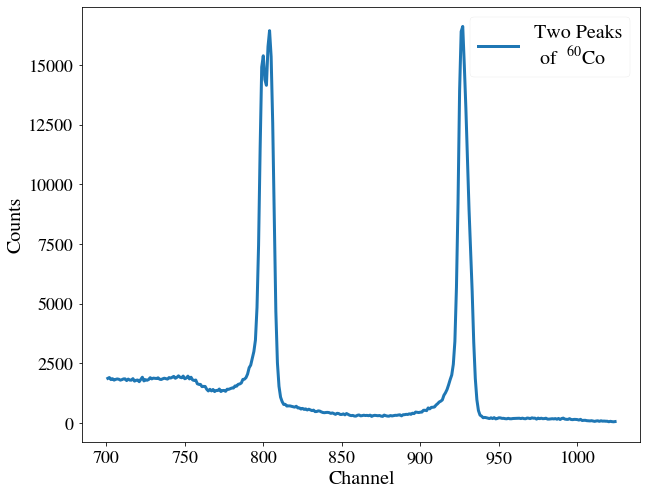

In [10]:
plt.figure(figsize=(10,8))
plt.plot(Channel[Channel > 700],NetSigCo[Channel > 700],label = "Two Peaks\n of $~^{60}$Co")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.legend(loc="upper right")
plt.savefig("../plots/Co_two_Peak.pdf")

In [11]:
Compton_ave = np.mean(NetSigCo[np.logical_and(Channel > 110 , Channel < 315)])
Compton_ave

4459.524509803921

In [12]:
Co60_csv = pd.read_csv("../data/60Co.csv").set_index("Peak")

In [13]:
Co60_csv.to_latex("../Report/Co60.tex")

In [14]:
16633 / Compton_ave

3.729769836096568

In [15]:
7.7*(1332.5-1173.2)/(926-803)

9.97243902439024

In [16]:
149863 / 528 / 92740

0.0030605072179635475

In [18]:
import statsmodels.api as sm

In [29]:
X = sm.add_constant(np.array([1173.2,1332.5]))

In [30]:
Y = Co60_csv['Channel']

In [31]:
lm1 = sm.OLS(Y,X)
lm1_res = lm1.fit()
lm1_res.summary()

/home/sitianq/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/sitianq/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/sitianq/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/sitianq/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Channel   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                nan
Time:                        20:22:14   Log-Likelihood:                 51.776
No. Observations:                   2   AIC:                            -99.55
Df Residuals:                       0   BIC:                            -102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -102.8606        inf         -0        nan         nan         nan
x1             0.7721        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.054
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
Eu_pred_1 = np.array([39.3,45.7,121.78,244.69,344.28,411.3,444.0,778.9,964.0,1085.8,1112.0,1408.03])
X_Eu = sm.add_constant(Eu_pred_1)

In [33]:
lm1_res.predict(X_Eu)

array([-72.51600753, -67.57438795,  -8.83088512,  86.07137476,
       162.96760829, 214.71563089, 239.96421846, 498.54990584,
       641.47080979, 735.51600753, 755.74576271, 984.31883239])

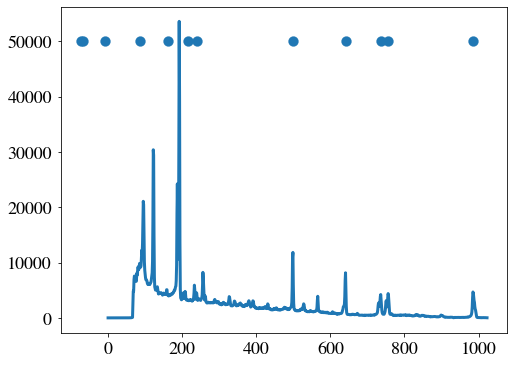

In [34]:
plt.plot(NetSigEuFull)
plt.scatter(lm1_res.predict(X_Eu),np.ones_like(Eu_pred_1)*50000)